In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_groups = 3
source = np.array([1, 0, 0])
scattering = np.array([[0.4,  0.1,  0.1],
                       [0.1,  0.3,  0.1],
                       [0.05, 0.3,  0.4]])
total = np.array([0.6, 0.8, 1.0])

In [3]:
convergence = 1e-6

In [4]:
max_iter = 30

# Functions

In [5]:
def s_g(group, sources, scatterings, flux):
    q = sources[group]
    scat_list = scatterings[:, group]
    scat_list[group] = 0.0
    s = q + np.sum(np.multiply(scat_list, flux))
    return s

In [6]:
def removal(group, total, scattering):
    return total[group] - scattering[group, group]

In [7]:
def new_flux(group, sources, scatterings, totals, old_flux):
    s = s_g(group, sources, scatterings, old_flux)
    r = removal(group, totals, scattering)
    return s / r

# Jacobi

In [8]:
initial_flux_guess = np.array([0.0, 0.0, 0.0])

In [9]:
old_flux = initial_flux_guess
loop_count = 0
c = [1.0]
while c[-1] > convergence:
    loop_count += 1
    if loop_count > max_iter:
        print(f"Maximum iterations ({loop_count - 1}) reached")
        break
    nf = np.array([new_flux(g, source, scattering, total, old_flux) for g in range(num_groups)])
    # Test for convergence
    if np.min(nf) == 0.0:
        c.append(1.0)
    else:
        c.append(np.max(np.abs(nf - old_flux) / nf))
    #print(nf)
    old_flux = nf
print(old_flux)

[1.73228343 0.2924634  0.20247467]


In [10]:
loop_count

14

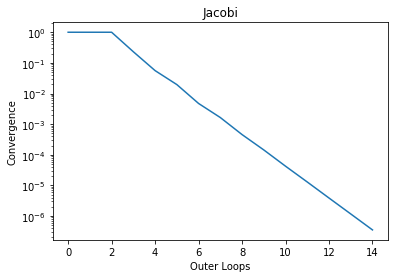

In [11]:
plt.plot(c)
plt.yscale("log")
plt.ylabel("Convergence")
plt.xlabel("Outer Loops")
plt.title("Jacobi")
plt.show()

# Gauss-Siedel

In [12]:
old_flux = initial_flux_guess
loop_count = 0
c = [1.0]
while c[-1] > convergence:
    loop_count += 1
    nf = old_flux.copy()
    if loop_count > max_iter:
        print(f"Maximum iterations ({loop_count - 1}) reached")
        break
    for g in range(num_groups):
        nf[g] = new_flux(g, source, scattering, total, nf)
    # Test for convergence
    if np.min(nf) == 0.0:
        c.append(1.0)
    else:
        c.append(np.max(np.abs(nf - old_flux) / nf))
    #print(nf)
    old_flux = nf
print(old_flux)

[1.73228343 0.29246342 0.20247468]


In [13]:
loop_count

8

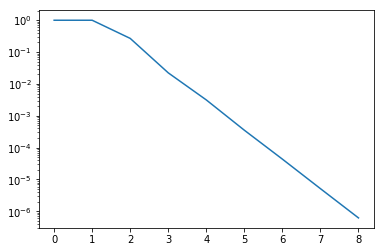

In [14]:
plt.plot(c)
plt.yscale("log")
plt.show()

In [15]:
np.sum(old_flux)

2.2272215277324103

# One-group flux

In [17]:
sigma_t = total @ old_flux / np.sum(old_flux)
print(sigma_t)

0.6626262612385492


In [18]:
sigma_s = np.sum(scattering @ old_flux) / np.sum(old_flux)
print(sigma_s)

0.18737373563909548


In [19]:
q = np.sum(source)
print(q)

1


In [20]:
sigma_a = sigma_t - sigma_s
print(sigma_a)

0.4752525255994537


In [22]:
one_group_flux = q / sigma_a
print(one_group_flux)

2.1041445255628317


In [23]:
np.sum(old_flux)

2.2272215277324103